In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [3]:
train_dataset = train.flow_from_directory('data/train/',
                                         target_size = (256,256),
                                         batch_size = 3,
                                         class_mode = 'binary')

val_dataset = validation.flow_from_directory('data/validation/',
                                         target_size = (256,256),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 302 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [10]:
model_fit = model.fit(train_dataset, epochs=15, validation_data=val_dataset)

Epoch 1/15
101/101 [==============================] - 32s 310ms/step - loss: 0.8262 - accuracy: 0.6026 - val_loss: 0.7344 - val_accuracy: 0.5556
Epoch 2/15
101/101 [==============================] - 36s 358ms/step - loss: 0.5485 - accuracy: 0.7550 - val_loss: 0.8185 - val_accuracy: 0.6111
Epoch 3/15
101/101 [==============================] - 34s 334ms/step - loss: 0.3990 - accuracy: 0.8411 - val_loss: 0.3569 - val_accuracy: 0.8444
Epoch 4/15
101/101 [==============================] - 34s 340ms/step - loss: 0.2864 - accuracy: 0.9172 - val_loss: 0.3463 - val_accuracy: 0.8444
Epoch 5/15
101/101 [==============================] - 35s 343ms/step - loss: 0.1812 - accuracy: 0.9238 - val_loss: 0.1052 - val_accuracy: 0.9556
Epoch 6/15
101/101 [==============================] - 35s 347ms/step - loss: 0.1349 - accuracy: 0.9437 - val_loss: 0.2557 - val_accuracy: 0.9667
Epoch 7/15
101/101 [==============================] - 35s 347ms/step - loss: 0.1005 - accuracy: 0.9603 - val_loss: 0.0498 - val_ac

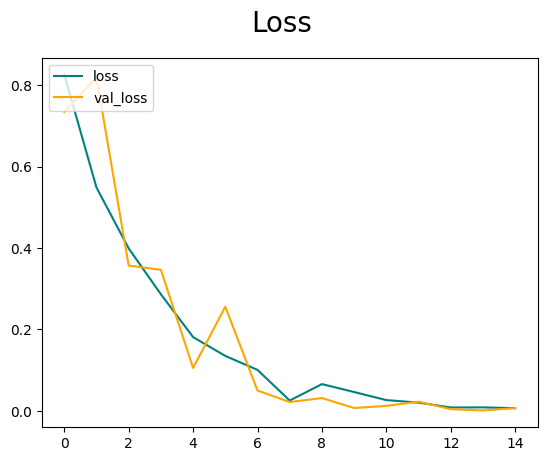

In [11]:
fig = plt.figure()
plt.plot(model_fit.history['loss'], color='teal', label='loss')
plt.plot(model_fit.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

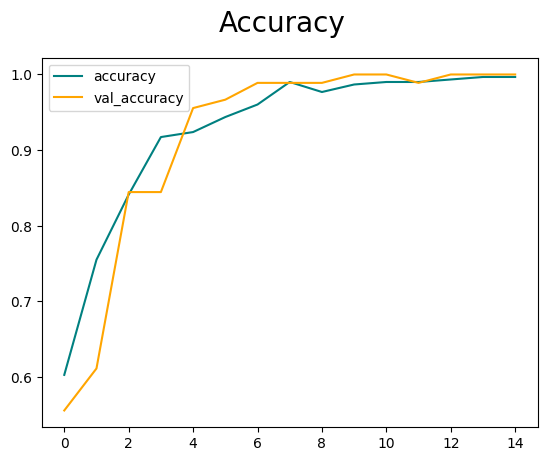

In [12]:
fig = plt.figure()
plt.plot(model_fit.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_fit.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
import cv2

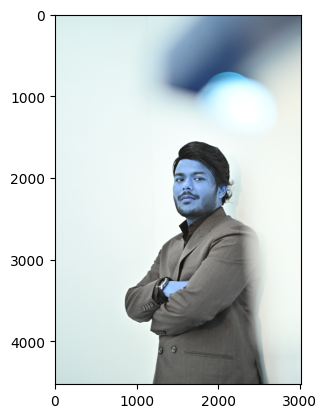

In [20]:
## Evaluating the Deep Learning Model over unseen data
img = cv2.imread('test.jpg')
plt.imshow(img)
plt.show()

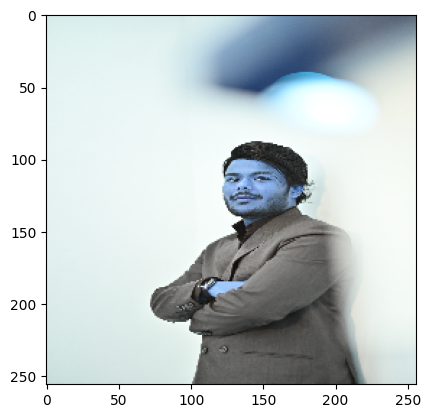

In [21]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [22]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 160ms/step


In [23]:
yhat

array([[0.9879253]], dtype=float32)

In [24]:
def predict():
    if yhat > 0.5:
        print(f'Sad')
    else:
        print(f'Happy')

In [25]:
from tensorflow.keras.models import load_model

In [26]:
model.save(os.path.join('models', 'imageClassifier.h5'))